In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from os import listdir, getcwd, chdir
from os.path import isfile, join

from diff_classifier.features import alpha_calc, unmask_track

import scipy.stats as stats
import numpy.ma as ma


In [2]:
workbookDir = getcwd()

print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir"
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/Nance Lab/diff_predictor/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/Nance Lab/diff_predictor


In [84]:
region_dataset_path = workbookDir + '/data/raw_data_region/'
region_filelist = [f for f in listdir(region_dataset_path) if isfile(join(region_dataset_path, f)) and 'msd' in f]
print(len(region_filelist))

df = pd.read_csv(region_dataset_path + region_filelist[0])
df.head()

38


,Unnamed: 0,Frame,Gauss,MSDs,Mean_Intensity,Quality,SN_Ratio,Track_ID,X,Y
0,0,0.0,0.000000,0.000000,298.333333,3.606415,0.813141,0.0,129.239101,1593.140939
1,1,1.0,1.336928,1.530730,294.581395,3.836334,0.656368,0.0,129.046960,1594.071087
2,2,2.0,1.451044,2.195838,296.441860,3.763641,0.779364,0.0,129.952997,1593.568735
3,3,3.0,1.555866,2.557840,296.922481,3.611755,0.681896,0.0,128.963113,1593.553681
4,4,4.0,1.691269,2.829390,297.209302,3.640472,0.705507,0.0,129.852017,1592.369503


In [90]:
region_feature_path = workbookDir + '/data/region_feature_folder/'
region_filelist = [f for f in listdir(region_feature_path) if isfile(join(region_feature_path, f)) and 'feat' in f]
df = pd.read_csv(region_feature_path + region_filelist[0])
df.head()



,Unnamed: 0,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,Mean Quality,Std Quality,Mean Mean_Intensity,Std Mean_Intensity,Mean SN_Ratio,Std SN_Ratio,Mean Deff1,Std Deff1,Mean Deff2,Std Deff2
0,0,0.0,1.611765e-02,26.711181,3.288428,0.945602,0.118247,0.372335,2.366365,0.577411,...,6.336652,1.319312,NaN,NaN,0.767566,0.170583,0.959069,1.306709,0.100702,0.109127
1,1,1.0,1.567008e-08,0.619012,2.837829,0.300884,0.539952,0.045650,1.128631,0.113970,...,9.120589,10.477690,NaN,NaN,0.944781,0.389032,0.196385,0.214294,0.018856,0.020472
2,2,2.0,3.825253e-01,0.025727,3.874284,0.038580,0.819546,0.004930,1.091210,0.083586,...,6.548744,5.622615,NaN,NaN,0.668841,0.169089,1.263415,2.049538,0.255571,0.469424
3,3,3.0,NaN,NaN,32.947937,0.981209,0.068865,0.477143,6.559554,0.847551,...,6.548744,5.622615,NaN,NaN,0.668841,0.169089,1.263415,2.049538,0.255571,0.469424
4,4,4.0,4.294176e-01,0.240604,2.306450,0.156974,0.657617,0.021563,1.523668,0.343689,...,9.120589,10.477690,NaN,NaN,0.944781,0.389032,0.196385,0.214294,0.018856,0.020472


In [91]:
df[df['alpha'] > 1.25]

,Unnamed: 0,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,Mean Quality,Std Quality,Mean Mean_Intensity,Std Mean_Intensity,Mean SN_Ratio,Std SN_Ratio,Mean Deff1,Std Deff1,Mean Deff2,Std Deff2
5,5,5.0,1.396096,7.189644e-05,9.163222,0.663870,0.319469,0.142722,2.594706,0.614600,...,6.920401,2.201128,NaN,NaN,0.634112,0.179135,0.012958,0.007478,0.001271,0.000588
8,8,8.0,1.597015,8.599563e-05,4.640663,0.858601,0.195178,0.257124,1.817494,0.449792,...,8.159693,6.120314,NaN,NaN,0.795577,0.135795,0.096924,0.118354,0.001818,0.001290
13,13,13.0,1.732698,2.746505e-06,2.281126,0.856388,0.196821,0.255129,1.833001,0.454447,...,8.159693,6.120314,NaN,NaN,0.795577,0.135795,0.096924,0.118354,0.001818,0.001290
21,21,21.0,8.124942,2.720136e-14,12.402952,0.477804,0.427280,0.083933,3.001179,0.666798,...,9.846891,12.149953,NaN,NaN,0.738559,0.230431,0.556320,0.831352,0.116258,0.180998
22,22,22.0,1.343639,2.672788e-05,3.249607,0.751979,0.266723,0.183381,1.673613,0.402490,...,7.234339,6.571611,NaN,NaN,0.745531,0.172183,0.593892,0.615883,0.080627,0.070367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,10199,10199.0,1.502256,1.428253e-03,8.942517,0.373011,0.491590,0.059845,1.369390,0.269748,...,10.023164,6.057890,NaN,NaN,0.804275,0.269374,0.181467,0.417212,0.006923,0.011215
10200,10200,10200.0,2.537927,5.085357e-03,4.844995,0.989482,0.051413,0.522534,5.426250,0.815711,...,10.247275,4.744538,NaN,NaN,0.989813,0.230194,0.980587,1.405788,0.002847,0.002683
10203,10203,10203.0,1.266737,3.688455e-01,5.337418,0.999969,0.002768,0.682198,14.261205,0.929880,...,12.301966,8.943613,NaN,NaN,0.819017,0.287661,0.390526,0.719791,0.002490,0.002876
10221,10221,10221.0,1.448673,1.426954e-01,1.761035,0.994084,0.038515,0.559628,4.027287,0.751694,...,10.023164,6.057890,NaN,NaN,0.804275,0.269374,0.181467,0.417212,0.006923,0.011215


In [86]:
trackids = df.Track_ID.unique()
partcount = trackids.shape[0]

for particle in range(0, partcount):
    single_track_masked =\
        df.loc[df['Track_ID'] ==
                trackids[particle]].sort_values(['Track_ID', 'Frame'],
                                                ascending=[
                                                1,
                                                1]).reset_index(drop=True)
    single_track = unmask_track(single_track_masked)
    alph, coef = alpha_calc(single_track)
    print(single_track)
    break

     Frame  Track_ID           X            Y      MSDs     Gauss   Quality  \
0      0.0       0.0  129.239101  1593.140939  0.000000  0.000000  3.606415   
1      1.0       0.0  129.046960  1594.071087  1.530730  1.336928  3.836334   
2      2.0       0.0  129.952997  1593.568735  2.195838  1.451044  3.763641   
3      3.0       0.0  128.963113  1593.553681  2.557840  1.555866  3.611755   
4      4.0       0.0  129.852017  1592.369503  2.829390  1.691269  3.640472   
..     ...       ...         ...          ...       ...       ...       ...   
646  646.0       0.0  129.218940  1592.118995  4.969132  0.586875  4.465149   
647  647.0       0.0  126.967122  1590.948566  5.767211  0.358155  5.813110   
648  648.0       0.0  128.415472  1592.477285  4.406605  0.576857  4.243042   
649  649.0       0.0  128.618981  1591.386643  4.665260  0.504408  4.965637   
650  650.0       0.0  128.935900  1591.651152  2.311394  0.461809  5.429535   

     SN_Ratio  Mean_Intensity  
0    0.813141      

In [14]:
len(df['Track_ID'].unique())

2431

In [29]:
X_min = df['X'].min()
X_max = df['X'].max()
X_max

2047.0

In [24]:
first_ID = df[df['Track_ID'] == 0.0]
first_ID

,Unnamed: 0,Frame,Gauss,MSDs,Mean_Intensity,Quality,SN_Ratio,Track_ID,X,Y
0,0,0.0,0.000000,0.000000,298.333333,3.606415,0.813141,0.0,129.239101,1593.140939
1,1,1.0,1.336928,1.530730,294.581395,3.836334,0.656368,0.0,129.046960,1594.071087
2,2,2.0,1.451044,2.195838,296.441860,3.763641,0.779364,0.0,129.952997,1593.568735
3,3,3.0,1.555866,2.557840,296.922481,3.611755,0.681896,0.0,128.963113,1593.553681
4,4,4.0,1.691269,2.829390,297.209302,3.640472,0.705507,0.0,129.852017,1592.369503
...,...,...,...,...,...,...,...,...,...,...
646,646,646.0,0.586875,4.969132,290.806202,4.465149,0.916786,0.0,129.218940,1592.118995
647,647,647.0,0.358155,5.767211,297.503876,5.813110,1.162390,0.0,126.967122,1590.948566
648,648,648.0,0.576857,4.406605,292.139535,4.243042,0.900691,0.0,128.415472,1592.477285
649,649,649.0,0.504408,4.665260,290.891473,4.965637,0.907300,0.0,128.618981,1591.386643


In [ ]:
traj_dict_list = []

trackids = df.Track_ID.unique()
partcount = trackids.shape[0]

for particle in range(0, partcount):
    single_track_masked =\
        df.loc[df['Track_ID'] ==
                trackids[particle]].sort_values(['Track_ID', 'Frame'],
                                                ascending=[
                                                1,
                                                1]).reset_index(drop=True)
    single_track = unmask_track(single_track_masked)
    alph, coef = alpha_calc(single_track)
    if (len(single_track) > 66) & (alph > 0):
        rc_short = (single_track['MSDs'][33] / 4 * 33) / (single_track['MSDs'][7] / 4*7)
        rc_long = (single_track['MSDs'][66] / 4 * 66) / (single_track['MSDs'][33] / 4*33)
        new_dict = {
            'X': single_track['X'],
            'Y': single_track['Y'],
            'alpha': alph,
            'rc_short': rc_short,
            'rc_long': rc_long
        }
        traj_dict_list.append(new_dict)

In [83]:


fig = plt.figure(figsize=(10,10))
particles = int(max(df['Track_ID']))

# if particles < size:
#     size = particles - 1
# else:
#     pass

frames = int(max(df['Frame']))

y = df['Y'].values.reshape((particles+1, frames+1))*umppx*umppx
x = df['X'].values.reshape((particles+1, frames+1))/fps
#     for i in range(0, particles+1):
#         y[i, :] = merged.loc[merged.Track_ID == i, 'MSDs']*umppx*umppx
#         x = merged.loc[merged.Track_ID == i, 'Frame']/fps

particles = np.linspace(0, particles, particles-1).astype(int)
particles = np.random.choice(particles, size=1000, replace=False)

y = np.zeros((particles.shape[0], frames+1))
for idx, val in enumerate(particles):
    y[idx, :] = df.loc[df.Track_ID == val, 'MSDs']*umppx*umppx
    x = df.loc[df.Track_ID == val, 'Frame']/fps
    plt.plot(x, y[idx, :], 'k', alpha=alpha)

geo_mean = np.nanmean(ma.log(y), axis=0)
geo_SEM = stats.sem(ma.log(y), axis=0, nan_policy='omit')
plt.plot(x, np.exp(geo_mean), 'k', linewidth=4)
plt.plot(x, np.exp(geo_mean-geo_SEM), 'k--', linewidth=2)
plt.plot(x, np.exp(geo_mean+geo_SEM), 'k--', linewidth=2)
plt.xlim(0, x_range)
plt.ylim(0, y_range)
plt.xlabel('Tau (s)', fontsize=25)
plt.ylabel(r'Mean Squared Displacement ($\mu$m$^2$)', fontsize=25)

ValueError: Number of samples, -1, must be non-negative.

<Figure size 720x720 with 0 Axes>

In [ ]:
for i in range(100):
    thing = traj_dict_list[i]
    print(thing['alpha'], thing['rc_short'], thing['rc_long'])
    print()

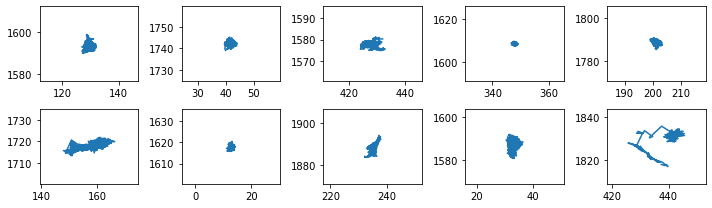

In [93]:
fig = plt.figure(figsize=(10, 3))#, sharey=True, sharex=True)
counter = 0
for thing in traj_dict_list:
    if (thing['alpha'] < 0.75) & (counter < 10):
        plt.subplot(2,5,counter+1)
        plt.plot(thing['X'], thing['Y'])

        xmin = thing['X'].min()
        xmax = thing['X'].max()
        ymin = thing['Y'].min()
        ymax = thing['Y'].max()

        xrange = [(xmax+xmin)/2 - 17.5,(xmax+xmin)/2 + 17.5]
        yrange = [(ymax+ymin)/2 - 17.5,(ymax+ymin)/2 + 17.5]
        plt.xlim(xrange)
        plt.ylim(yrange)
        counter += 1
fig.tight_layout()

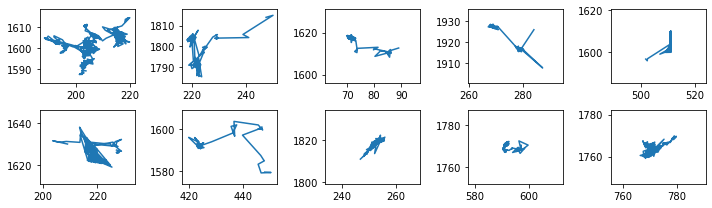

In [94]:
fig = plt.figure(figsize=(10, 3))#, sharey=True, sharex=True)
counter = 0
for thing in traj_dict_list:
    if (thing['alpha'] > 1.25) & (counter < 10):
        plt.subplot(2,5,counter+1)
        plt.plot(thing['X'], thing['Y'])

        xmin = thing['X'].min()
        xmax = thing['X'].max()
        ymin = thing['Y'].min()
        ymax = thing['Y'].max()

        xrange = [(xmax+xmin)/2 - 17.5,(xmax+xmin)/2 + 17.5]
        yrange = [(ymax+ymin)/2 - 17.5,(ymax+ymin)/2 + 17.5]
        plt.xlim(xrange)
        plt.ylim(yrange)
        counter += 1
fig.tight_layout()